<h5> Description of dataset and task

The Entertainment Software Rating Board(ESRB) ratings provide information about the contents of a game so parents and consumers can make informed choices about which game are right for the family (https://www.esrb.org/#rating-categories).

The *Video Games Rating by 'ESRB'* is a dataset composed of **1895** games with 34 of *ESRB Rating Content* along with its name and console exclusivity as features for each game. 
<p> This Notebook aims to create and experiment models capable of classifying games into their proper *ESRB Rating*. </p>


*ESRB Rating Content* (32) refers to the following:
- Alcohol Reference : Reference to and/or images of alcoholic beverages.
- Animated Blood : Discolored and/or unrealistic depictions of blood.
- Blood : Depictions of blood.
- Blood and Gore : 	Depictions of blood or the mutilation of body parts.
- Cartoon Violence : Violent actions involving cartoon-like situations and characters. May include violence where a character is unharmed after the action has been inflicted.
- Crude Humor : Depictions or dialogue involving vulgar antics, including "bathroom" humor.
- Drug Reference : 	Reference to and/or images of illegal drugs.
- Fantasy Violence : Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life.
- Intense Violence : Graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death.
- Language : Moderate use of profanity.
- Lyrics : References to profanity, sexuality, violence, alcohol, or drug use in music.
- Mature Humor : Depictions or dialogue involving "adult" humor, including sexual references.
- Mild Blood : 	Some blood.
- Mild Cartoon Violence : Some violent actions involving cartoon.
- Mild Fantasy Violence : Some violent actions of a fantasy nature.
- Mild Language : 	Mild to moderate use of profanity.
- Mild Lyrics : Mild References to profanity, sexuality, violence, alcohol, or drug use in music.
- Mild Suggestive Themes : 	some provocative references or materials
- Mild Violence : 	Some scenes involving aggressive conflict.
- No Descriptors : 	No content descriptors
- Nudity : 	Graphic or prolonged depictions of nudity.
- Partial Nudity : Brief and/or mild depictions of nudity.
- Sexual Content : Non-explicit depictions of sexual behavior, possibly including partial nudity.
- Sexual Themes : 	References to sex or sexuality.
- Simulated Gambling : Player can gamble without betting or wagering real cash or currency.
- Strong Language : Explicit and/or frequent use of profanity.
- Strong Sexual Content : 	Explicit and/or frequent depictions of sexual behavior, possibly including nudity.
- Suggestive Themes : 	Provocative references or materials.
- Use of Alcohol :	The consumption of alcoholic beverages.
- Use of Drugs and Alcohol : The consumption of alcoholic and drugs beverages.
- Violence : Scenes involving aggressive conflict. May contain bloodless dismemberment.

*ESRB Rating* refers to the following:
- E : Everyone
- ET : Everyone 10+
- T : teen
- M : Mature

Import revelant libraries.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

<h5>  Data Preprocessing

In [3]:
# from jupyterthemes import jtplot
# jtplot.style()

In [148]:
df_esrb = pd.read_csv("Video_Games_esrb_rating.csv")
df_esrb.head(5)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [149]:
df_esrb.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

`strong_janguage` is a clear typo of `strong_language` so we replace that.

In [150]:
df_esrb = df_esrb.rename(columns={"strong_janguage" : "strong_language"})

Let's display the general `info` of the dataset

In [151]:
df_esrb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

Since theres no `null` values in the dataset, we can proceed

In [152]:
df_no_desriptors = df_esrb[df_esrb['no_descriptors'] == 1].sum(axis=1) 
df_no_desriptors.shape[0]

322

Since `no_descriptors` means that none of the _ESRB Content_ is found in the game, we need to check fix games that might contradict that.

In [153]:
(df_no_desriptors>1).sum()
# print(df_no_desriptors)

205

In [154]:
idx = df_no_desriptors[df_no_desriptors>1].index
# df_esrb.iloc[idx].loc['no_descriptors'] = 0

df_esrb.loc[idx,'no_descriptors'] = 0

df_esrb.iloc[idx]['no_descriptors']

0       0
5       0
27      0
30      0
31      0
       ..
1867    0
1872    0
1875    0
1877    0
1894    0
Name: no_descriptors, Length: 205, dtype: int64

Seems like there are 205 entries have the `no_descriptors` flagged wrong.

<h5> Exploratory data analysis

Which _ESRB Rating_ is most prominent?

([<matplotlib.patches.Wedge at 0x21e0e49e880>,
 [Text(0.4571073038439642, 1.000526317880995, 'E'),
  Text(-1.0846159132817186, 0.18332572284342297, 'ET'),
  Text(-0.40849519606388207, -1.021338178466237, 'T'),
  Text(0.8812655227327117, -0.6583092574486862, 'M')],
 [Text(0.24933125664216227, 0.5457416279350882, '689'),
  Text(-0.5916086799718464, 0.09999584882368524, '416'),
  Text(-0.2228155614893902, -0.5570935518906747, '403'),
  Text(0.48069028512693357, -0.3590777767901924, '387')])

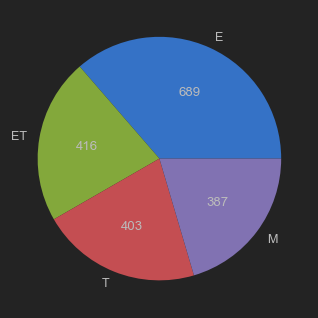

In [155]:
ratings = ["E" , "ET" , "T", "M"]

counts = df_esrb['esrb_rating'].value_counts()

plt.pie(counts, labels= ratings, autopct= lambda x: '{:.0f}'.format(x* len(df_esrb) / 100))

The _ESRB Rating_ **T** appears to be the most prominent rating.

Next, lets find the most prominent `ESRB Rating Content`

<AxesSubplot:>

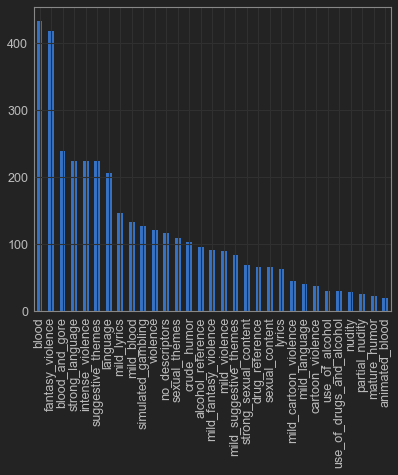

In [133]:
df_dropped = df_esrb.drop(['title','console','esrb_rating'], axis = 1)
df_count_content = df_dropped.sum(axis=0)
df_count_content.sort_values(axis=0, ascending=False, inplace=True)
df_count_content.plot.bar(x="Content", y="Count", )

We can visibly see that the _ESRB Content_ **blood** is the most prominent while **fantasy_violence** comes close in second.

Let us check the correlelations of each _ESRB Content_

In [159]:
df_esrb.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [160]:
correlation = df_dropped.corr()
correlation.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
alcohol_reference,1.00,0.00,-0.08,-0.04,0.05,-0.00,0.01,-0.08,0.15,-0.03,0.08,0.11,0.02,0.12,-0.04,0.03,0.01,0.22,0.10,-0.06,0.03,-0.01,-0.04,-0.03,-0.00,-0.08,0.01,-0.00,0.16,-0.03,-0.04
animated_blood,0.00,1.00,-0.05,-0.04,-0.01,-0.00,0.15,-0.03,0.09,0.05,-0.02,-0.01,0.03,-0.02,-0.02,-0.01,-0.03,0.06,-0.02,-0.03,-0.01,-0.01,-0.02,-0.02,-0.03,-0.02,-0.02,-0.04,0.07,0.03,0.02
blood,-0.08,-0.05,1.00,-0.21,-0.07,-0.08,-0.04,-0.17,0.09,0.03,0.06,0.12,-0.13,-0.07,-0.12,-0.08,-0.01,-0.00,-0.08,-0.14,-0.02,0.05,0.08,0.07,0.11,0.29,-0.04,0.09,-0.04,-0.02,0.01
blood_and_gore,-0.04,-0.04,-0.21,1.00,-0.04,-0.03,0.12,-0.17,0.29,0.10,0.05,-0.03,-0.07,-0.06,-0.08,-0.06,-0.09,-0.04,-0.05,-0.10,0.12,-0.00,0.14,0.12,0.01,0.22,0.34,-0.03,-0.01,0.05,0.06
cartoon_violence,0.05,-0.01,-0.07,-0.04,1.00,-0.02,0.01,-0.08,-0.05,-0.05,0.04,-0.02,-0.04,0.00,-0.01,-0.02,0.00,0.08,0.02,-0.04,-0.02,-0.02,-0.03,0.03,-0.02,-0.05,-0.03,0.01,0.04,0.01,-0.04
crude_humor,-0.00,-0.00,-0.08,-0.03,-0.02,1.00,-0.05,-0.08,0.09,-0.06,0.03,0.02,-0.06,0.10,-0.02,0.01,-0.06,0.08,-0.03,-0.06,0.01,0.01,-0.03,-0.03,0.32,-0.07,0.02,-0.03,-0.01,-0.03,-0.01
drug_reference,0.01,0.15,-0.04,0.12,0.01,-0.05,1.00,-0.10,0.02,0.17,0.05,0.06,0.14,-0.01,-0.03,-0.03,0.01,0.02,0.01,-0.05,0.02,0.05,0.03,0.09,0.06,0.16,0.07,0.04,-0.02,-0.02,-0.00
fantasy_violence,-0.08,-0.03,-0.17,-0.17,-0.08,-0.08,-0.10,1.00,-0.17,-0.00,-0.03,0.06,0.23,-0.07,-0.11,-0.08,0.10,0.03,-0.01,-0.14,-0.01,-0.05,-0.04,-0.04,-0.04,-0.07,-0.05,0.08,0.00,0.00,-0.09
intense_violence,0.15,0.09,0.09,0.29,-0.05,0.09,0.02,-0.17,1.00,-0.11,0.07,0.05,-0.06,0.09,-0.07,-0.05,-0.11,0.17,0.01,-0.09,0.09,-0.04,0.00,0.02,0.01,0.10,0.39,-0.01,0.06,0.01,-0.01
language,-0.03,0.05,0.03,0.10,-0.05,-0.06,0.17,-0.00,-0.11,1.00,-0.04,-0.01,0.04,-0.05,-0.05,-0.02,-0.10,-0.08,-0.01,-0.09,0.08,0.02,-0.03,0.09,0.04,0.02,-0.01,0.08,-0.00,0.02,-0.02


It seems that generally the correlation between each *ESRB Content* is very weak with the strongest correlation of *0.39* between .

<h5> Model Training

<h5> Model Selection and hyperparameter tuning

<h5> Insights and conclusion